In [11]:
import kagglehub
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split

from trainer import Trainer

#import Dataloader
from dataloader import ImageColorizerDataset

#import architectures
from neural_nets import ImageColorizer, ImageSuperRes, UNet, UNetRes

In [12]:
# Download latest version
IMAGE_PATH = kagglehub.dataset_download("arnaud58/landscape-pictures")
print("Path to dataset files:", IMAGE_PATH)

Path to dataset files: /Users/gabrielmindlberger/.cache/kagglehub/datasets/arnaud58/landscape-pictures/versions/2


In [13]:
# 2. Device config
device = torch.device(
    'mps' if torch.backends.mps.is_available()
    else 'cuda' if torch.cuda.is_available()
    else 'cpu'
)

print(f'Using device: {device}')

Using device: mps


In [14]:
# 3. Hyperparameters
img_height, img_width = 128, 128
batch_size            = 16
num_epochs            = 1
learning_rate         = 1e-3

In [15]:
# 6. DataLoader
dataset   = ImageColorizerDataset(IMAGE_PATH, img_height, img_width)

val_frac  = 0.1
n_total   = len(dataset)
n_val     = int(n_total * val_frac)
n_train   = n_total - n_val

# 3) Splitten
train_ds, val_ds = random_split(dataset, [n_train, n_val])

train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False, num_workers=4)
print(f'Loaded {len(dataset)} images.')

Loaded 4319 images.


In [16]:
model = ImageColorizer(in_channels=1, out_channels=3)                               #UNetResidual
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

ImageColorizer(
  (enc1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (enc2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (enc3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (up1): Upsample(scale_factor=2.0, mode='nearest')
  (dec1): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (up2): Upsample(scale_factor=2.0, mode='nearest')
  (dec2): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (final): Conv2d(64, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU(inplace=True)
  (sigmoid): Sigmoid()
)


Epoch 1/1 — Train Loss: 0.0117 | Val Loss: 0.0110


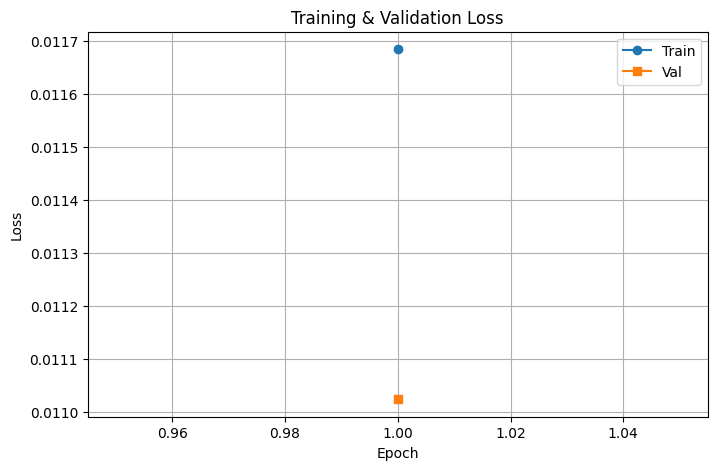

In [21]:
trainer = Trainer(model, train_loader, val_loader, criterion, optimizer, device)
trainer.fit(num_epochs)

# 4) Lernkurve anzeigen
trainer.plot_history()

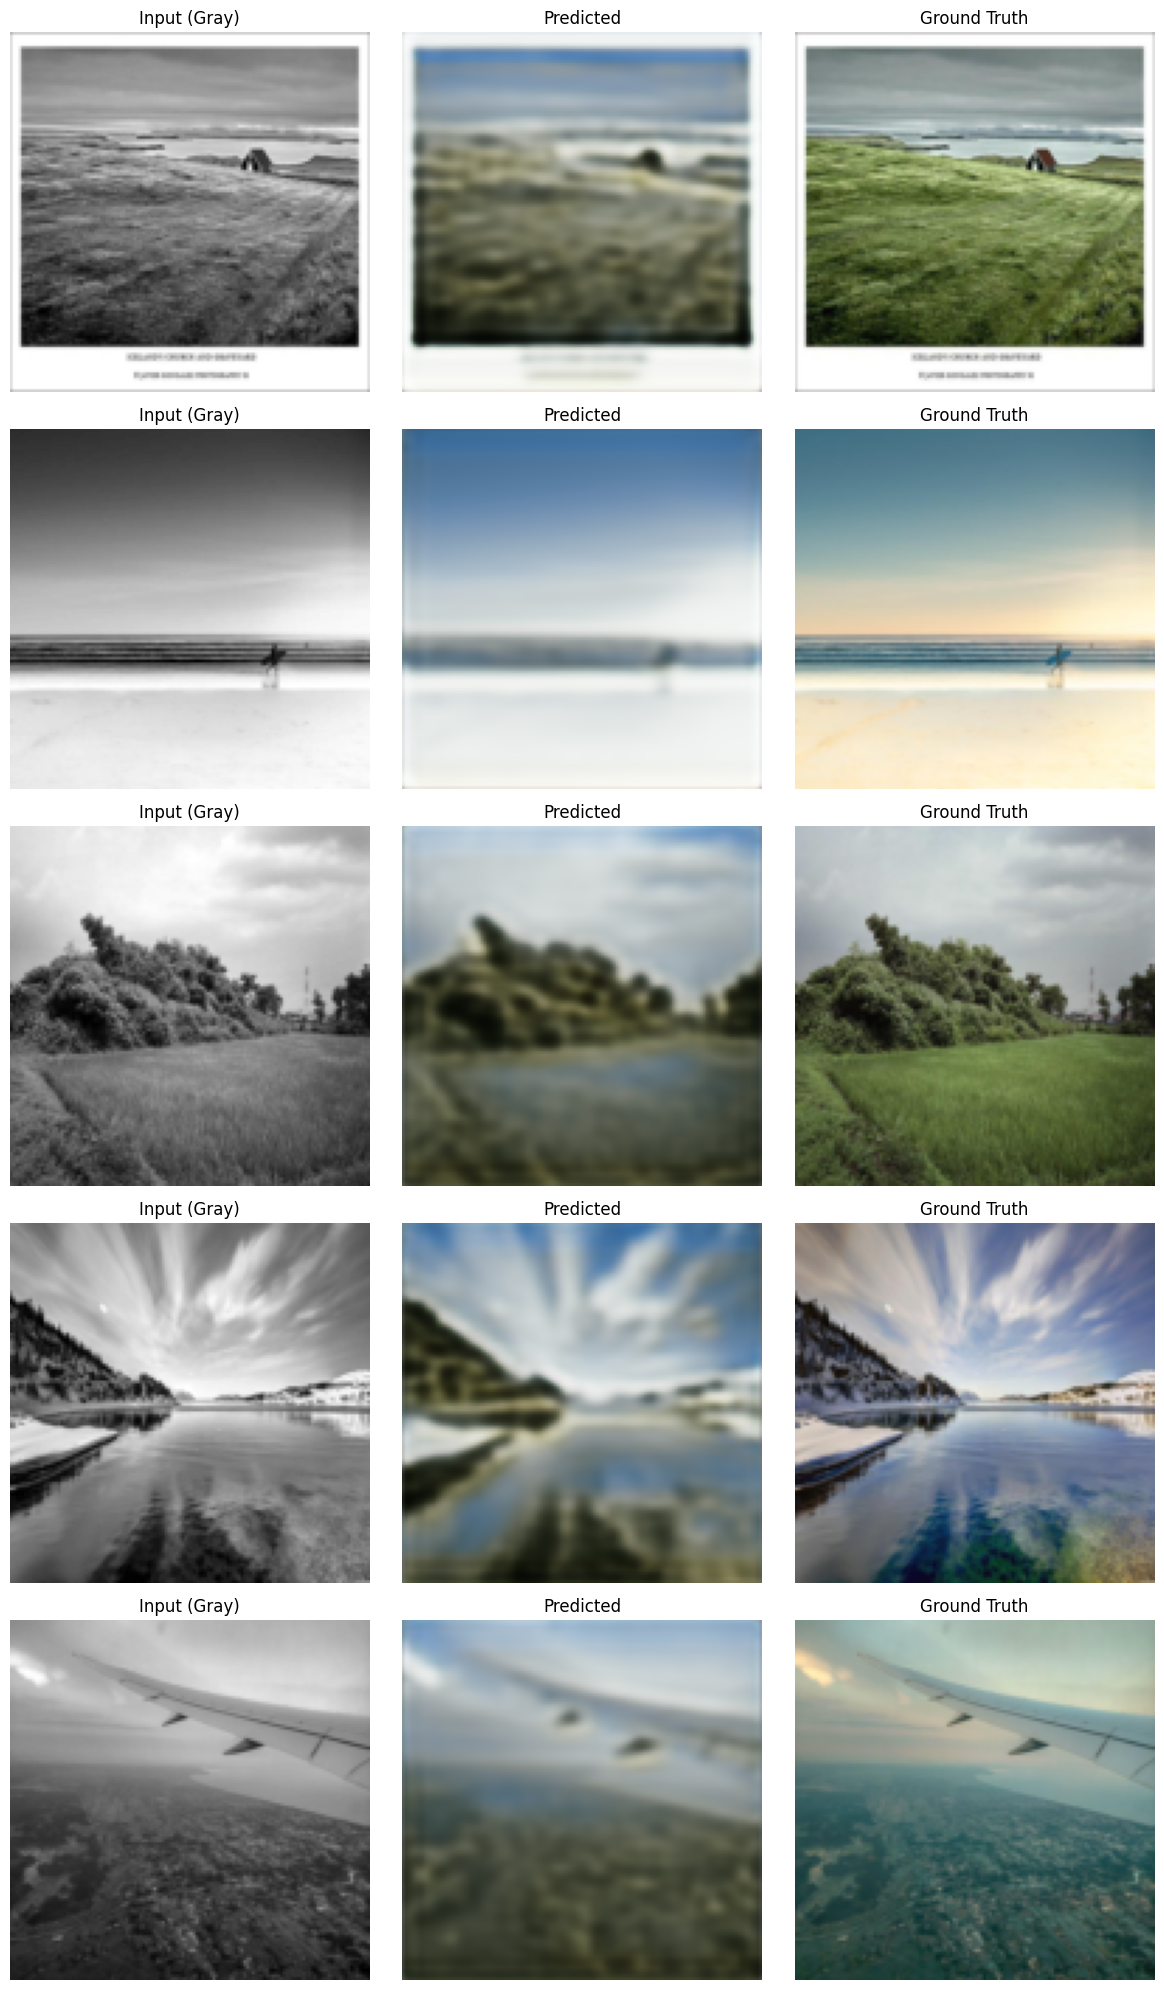

In [22]:
#acthung Test LOADER erzeugen!!!!
trainer.show_examples(val_loader)